In [2]:
import os
import ee
try:
    ee.Initialize()
except:
    ee.Authenticate()
    ee.Initialize()

import geemap

from geeml.utils import eeprint

In [3]:
os.chdir(r"C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components")
os.getcwd()

'C:\\Users\\coach\\myfiles\\postdoc\\Fire\\code\\Burn_Area_Mapping\\src\\components'

In [4]:
from data_extraction import extractDataset
%load_ext autoreload

In [26]:
%autoreload 2

In [6]:

Map = geemap.Map()
fc = ee.FeatureCollection("projects/ee-geethensingh/assets/postdoc/proj_fired_south_africa_to2021182_events")
Map.addLayer(ee.Feature(fc.first()), {'color': 'red'}, "Fire Test")
Map.centerObject(fc.first(), 12)
Map

Map(center=[-31.374999751707104, 29.510986261502627], controls=(WidgetControl(options=['position', 'transparen…

## Step 1: Data extraction

In [7]:
fireEvents = fc.map(lambda ft: ft.set('system:time_start', ee.Date(ft.get('ig_date')))
                    .set('system:time_end', ee.Date(ft.get('last_date')))).filterDate('2019-01-01', '2020-01-01')

In [8]:
extractDataset('LANDSAT_8', 'South Africa', ee.Date('2019-09-01'), ee.Date('2020-01-01'), fireEvents, 16, 'extract_20190912.csv')

  0%|          | 0/572 [00:00<?, ?it/s]

## Step 2: train and eval

In [5]:
from data_ingestion import dataIngestion
from data_transformation import dataTransformation
from model_trainer import modelTrainer

Naive Baseline Accuracy: 0.74
No best model found, metric < 0.6
classification report               precision    recall  f1-score   support

         0.0       0.75      0.99      0.86       206
         1.0       0.67      0.06      0.10        71

    accuracy                           0.75       277
   macro avg       0.71      0.52      0.48       277
weighted avg       0.73      0.75      0.66       277

Confusion Matrix:


0.1038961038961039

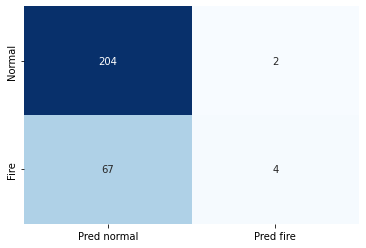

In [6]:
obj = dataIngestion()
train_path, test_path = obj.initiate_data_ingestion()
data_transformation = dataTransformation()
train_arr, test_arr = data_transformation.initiate_data_transformation(train_path, test_path)

model_trainer = modelTrainer()
model_trainer.initiate_model_trainer(train_arr, test_arr)

## Step 3: Inference

In [6]:
from inference import Inference

inference_pipeline = Inference()
sceneList = inference_pipeline.initiate_inference_pipeline('LANDSAT_8', 'South Africa')
sceneList

Number of new scenes: 81
input dates 2024-02-24 2024-03-19


  0%|          | 0/81 [00:00<?, ?it/s]

C:\Users\coach\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0    2_LC08_169079_20240309
0    2_LC08_171076_20240307
0    2_LC08_171077_20240307
0    2_LC08_171082_20240307
0    2_LC08_174078_20240225
0    2_LC08_174082_20240225
0    2_LC08_175077_20240303
Name: scenes, dtype: object

In [43]:
# Example usage:
# Delete logs older than March 1, 2024
delete_old_logs(r'C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping', datetime.datetime(2024, 3, 11))
# Or, delete logs older than one month (default behavior)
delete_old_logs(r'C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping')

Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_06_2024_14_13_35.log\03_06_2024_14_13_35.log
Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_06_2024_23_25_28.log\03_06_2024_23_25_28.log
Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_07_2024_09_11_34.log\03_07_2024_09_11_34.log
Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_07_2024_20_08_47.log\03_07_2024_20_08_47.log
Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_08_2024_09_41_30.log\03_08_2024_09_41_30.log
Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_08_2024_10_15_57.log\03_08_2024_10_15_57.log
Deleted file: C:\Users\coach\myfiles\postdoc\Fire\code\Burn_Area_Mapping\src\components\logs\03_08_2024_10_19_03.log\03_08_2024_10_19_03.log
Deleted file: